<div class="alert alert-info">
Ссылка для просмотра ноутбука в интерактивном режиме для использования гиперссылок и корректного отображения разметки:<br>
<a href='https://nbviewer.org/github/yulianikola/portfolio/blob/master/data_analysis_python/7_linear_disr_analysis/job_satisf.ipynb'>job_satisf</a></div>

### Линейный дискриминантный анализ
#### Данные опроса уровня удовлетворенности сотрудниками работой

<p id="0">
<h4>Задачи анализа:</h4>
<ol>
    <a href="#1"><li>Рассчитать основные статистики</li></a> 
    <a href="#2"><li>Определить две наиболее и наименее скоррелированные количественные переменные</li></a>  
    <a href="#3"><li>Распределение сотрудников по департаментам</li></a>  
    <a href="#4"><li>Распределение сотрудников по зарплатам</li></a>  
    <a href="#5"><li>Распределение сотрудников по зарплатам в каждом из департаментов</li></a>  
    <a href="#6"><li>Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом</li></a>  
    <a href="#7"><li>Для уволившихся и неуволившихся рассчитать:</li></a>    
        <ol>
            <li>доля сотрудников с повышением за последние 5 лет</li>
            <li>средняя степень удовлетворенности</li>
            <li>среднее количество проектов</li>
        </ol>
    <a href="#8"><li>Построить модель линейного дискриминантного анализа (LDA), предсказывающую уволился ли сотрудник на основе факторов (кроме department и salary)</li></a> 
</ol>

#### Описание датасета:
* satisfaction_level - уровень удовлетворенности работой  
* Last_evaluation - время с момента последней оценки в годах  
* number_projects - количество проектов, выполненных за время работы
* average_monthly_hour - среднее количество часов на рабочем месте в месяц
* time_spend_company - стаж работы в компании в годах
* work_accident - происходили ли несчастные случаи на рабочем месте с сотрудником
* left - уволился ли сотрудник
* promotion_last_5years - повышался ли сотрудник за последние пять лет
* department - отдел в котором работает сотрудник
* salary - относительный уровень зарплаты

<h4>Знакомство с данными</h4>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

In [2]:
hr = pd.read_csv('c:\\python\\portfolio\\data_analysis_python\\7_linear_disr_analysis\\data\\job_satisf.csv')
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


Переименуем столбцы в более сокращенный вариант для удобства:

In [3]:
hr.columns = ['sat_level','last_eval','numb_proj',
              'avg_mnth_hrs','time_spend_comp','work_accid',
              'left','prom_last_5y','dprmt','salary']
hr.head()

,sat_level,last_eval,numb_proj,avg_mnth_hrs,time_spend_comp,work_accid,left,prom_last_5y,dprmt,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sat_level        14999 non-null  float64
 1   last_eval        14999 non-null  float64
 2   numb_proj        14999 non-null  int64  
 3   avg_mnth_hrs     14999 non-null  int64  
 4   time_spend_comp  14999 non-null  int64  
 5   work_accid       14999 non-null  int64  
 6   left             14999 non-null  int64  
 7   prom_last_5y     14999 non-null  int64  
 8   dprmt            14999 non-null  object 
 9   salary           14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


##### Выводы
* Выборка состоит из 14999 строк и 10 столбцов, пропусков нет  
* Каждой строке соответствует один сотрудник, то есть выборка по 14999 сотрудникам  
* Среди показателей есть два количественных непрерывных: sat_level и last_eval   
* Три количественных дискретных: numb_proj, avg_mnth_hrs и time_spend_comp  
* Три качественных номинальных (булева/бинарная/dummy переменная): work_accid, left и prom_last_5y  
* Два качественных номинальных (текстовые): dprmt и salary  
* Типы данных pandas определены корректно (значит пропусков обозначенных какими-то символами нет)
* Объем данных в памяти - 1 МВ

<p id="1">
<h4>1. Cтатистики переменных</h4>

In [5]:
pd.set_option("precision", 3)
stat = hr.describe()
stat

,sat_level,last_eval,numb_proj,avg_mnth_hrs,time_spend_comp,work_accid,left,prom_last_5y
count,14999.000,14999.000,14999.000,14999.000,14999.000,14999.000,14999.000,14999.000
mean,0.613,0.716,3.803,201.050,3.498,0.145,0.238,0.021
std,0.249,0.171,1.233,49.943,1.460,0.352,0.426,0.144
min,0.090,0.360,2.000,96.000,2.000,0.000,0.000,0.000
25%,0.440,0.560,3.000,156.000,3.000,0.000,0.000,0.000
50%,0.640,0.720,4.000,200.000,3.000,0.000,0.000,0.000
75%,0.820,0.870,5.000,245.000,4.000,0.000,0.000,0.000
max,1.000,1.000,7.000,310.000,10.000,1.000,1.000,1.000


Посмотрим распределение значений для текстовых переменных:

In [6]:
hr.dprmt.value_counts(normalize = True)

sales          0.276
technical      0.181
support        0.149
IT             0.082
product_mng    0.060
marketing      0.057
RandD          0.052
accounting     0.051
hr             0.049
management     0.042
Name: dprmt, dtype: float64

In [7]:
hr.salary.value_counts(normalize = True)

low       0.488
medium    0.430
high      0.082
Name: salary, dtype: float64

Консолидируем статистики признаков:

In [9]:
variables_num = {'sat_level':'уровень удовл. работой','last_eval':'годы с послед. оценки',
                 'numb_proj':'кол-во выполненных проектов', 'avg_mnth_hrs':'ср. кол-во раб. часов в мес.',
                 'time_spend_comp':'годы стаж'}
variables_cat = {'work_accid':'был ли несч. случай на работе',
                 'left':'уволился ли','prom_last_5y':'повышался ли за 5 лет',
                 'dprmt':'отдел','salary':'уровень з/п'}
for variable in variables_num.keys():
    if variable in stat.columns:
        print(variable, end = ' ')
        print(f'({variables_num[variable]})', end = ': ') 
        print('средн.',round(stat[variable]['mean'],2), end = ', ')
        print('медиана',round(stat[variable]['50%'],2), end = ', ')
        print('мода',round(hr[variable].mode()[0],1), end = ', ')
        print('min/max',stat[variable]['min'],'/',stat[variable]['max'],end = ', ')
        print('СКО',round(stat[variable]['std'],2), end = ', ')
        print('IQR',round(stat[variable]['75%']-stat[variable]['25%'],2), end = '')
        print('')
for variable in variables_cat.keys():
    if variable in stat.columns:
        print(variable, end=' ')
        print(f'({variables_cat[variable]})', end = ': ') 
        print('средн.',round(stat[variable]['mean'],2), end = '')
        print('')
print('dprmt (', variables_cat['dprmt'],'):', 'мода -', hr.dprmt.mode()[0])
print('salary (', variables_cat['salary'],'):', 'мода -', hr.salary.mode()[0])

sat_level (уровень удовл. работой): средн. 0.61, медиана 0.64, мода 0.1, min/max 0.09 / 1.0, СКО 0.25, IQR 0.38
last_eval (годы с послед. оценки): средн. 0.72, медиана 0.72, мода 0.6, min/max 0.36 / 1.0, СКО 0.17, IQR 0.31
numb_proj (кол-во выполненных проектов): средн. 3.8, медиана 4.0, мода 4, min/max 2.0 / 7.0, СКО 1.23, IQR 2.0
avg_mnth_hrs (ср. кол-во раб. часов в мес.): средн. 201.05, медиана 200.0, мода 135, min/max 96.0 / 310.0, СКО 49.94, IQR 89.0
time_spend_comp (годы стаж): средн. 3.5, медиана 3.0, мода 3, min/max 2.0 / 10.0, СКО 1.46, IQR 1.0
work_accid (был ли несч. случай на работе): средн. 0.14
left (уволился ли): средн. 0.24
prom_last_5y (повышался ли за 5 лет): средн. 0.02
dprmt ( отдел ): мода - sales
salary ( уровень з/п ): мода - low


Распределения количественных показателей:

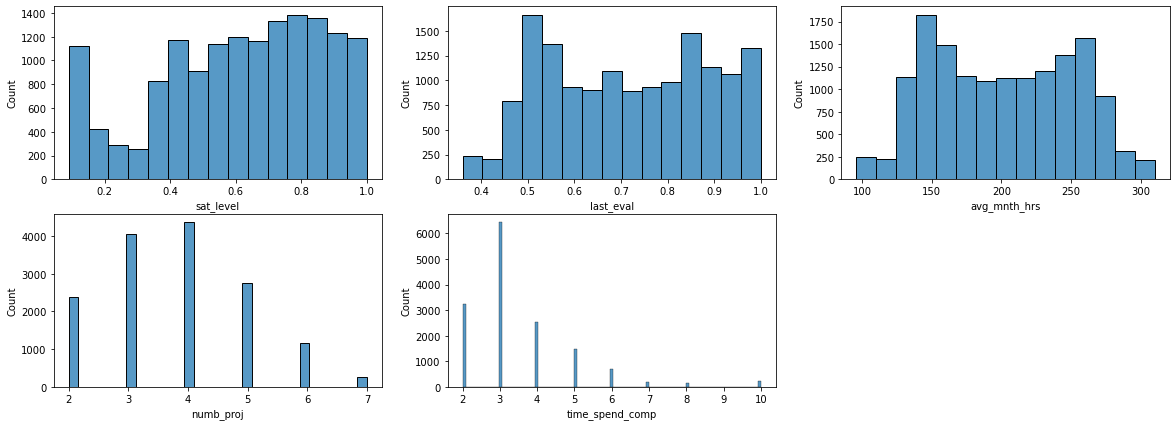

In [10]:
plt.figure(figsize = (20, 7)) 
plt.subplot(2,3,1)
sns.histplot(hr.sat_level, bins = 15);
plt.subplot(2,3,2)
sns.histplot(hr.last_eval, bins = 15);
plt.subplot(2,3,3)
sns.histplot(hr.avg_mnth_hrs, bins = 15);
plt.subplot(2,3,4)
sns.histplot(hr.numb_proj);
plt.subplot(2,3,5)
sns.histplot(hr.time_spend_comp);

##### 1. Выводы
* Уровень удовлетворенности работой (sat_level) принимает значения от 0 (0.09) до 1 (условно проценты). В среднем работники удовлетворены на 60% (медиана близка по значению). Разброс значительный от 10% до 100%. Существенную вариацию также подтверждает СКО 0.25 (существенно для признака со значениями от 0 до 1). Судя по третьему квартилю только 25% сотрудников удовлетворены более чем на 82%. Распределение не похоже на нормальное.
* Время с последней оценки (last_eval) колеблется от 0.36 до 1 (года), то есть от около 4 до 12 месяцев. В среднем для сотрудников с последней оценки прошло 0.72 года (около 8 мес.). Распределение не похоже на нормальное.
* Кол-во выполненных проектов за время работы (numb_proj) от 2 до 7, в среднем (и наиболее чаcто встречающееся значение) 4.
* Среднее кол-во отработанных часов в месяц (avg_mnth_hrs) около 200, то есть около 10 часов в день при пятидневке (в целом в рамках офисной нормы). Разброс значительный от 96 до 310 часов, СКО около 50. Половина сотрудников не превышает условную норму (200 часов в месяц). При этом четверть сотрудников работает около 12-15 часов в день (третий квартиль 245 часов в месяц и max 310).
* Средний стаж в компании (time_spend_comp) около трех лет. При этом 75% сотрудников имеют стаж 2-4 года (наиболее чаcто встречающееся значение 3 года), а четверть от 4 до 10 лет.
* Несчастные случаи на работе (work_accid) происходили с 14% сотрудников.
* Уволилось (left) 24% опрошенных.
* За последние 5 лет повышалось всего 2% сотрудников (prom_last_5y).
* Большая часть сотрудников в отделе sales (dprmt) - 28%. Следующие по величине отделы technical (18%) и support (15%).
* У большей части сотрудников низкий уровень (low) зарплаты (salary) - 49%. Средний уровень зарплаты у 43% и высокий у 8%.

Построим боксплоты и посмотрим есть ли выбросы. Выбросы видны только у признака time_spend_comp:

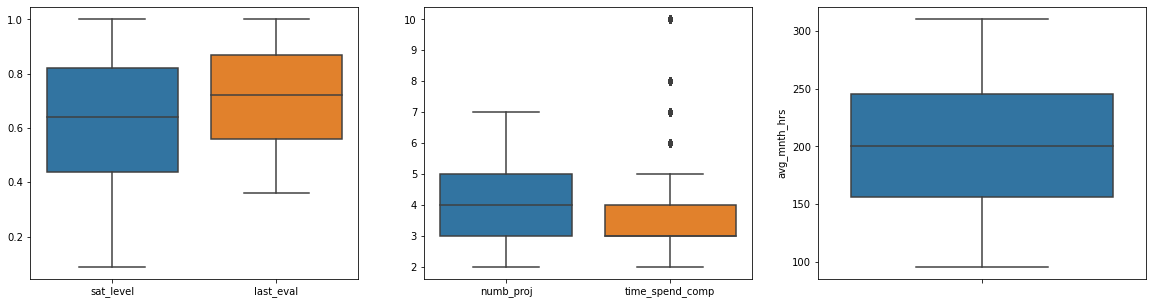

In [11]:
plt.figure(figsize = (20, 5)) 
plt.subplot(1,3,1)
sns.boxplot(data = hr[['sat_level','last_eval']]);
plt.subplot(1,3,2)
sns.boxplot(data = hr[['numb_proj','time_spend_comp']]);
plt.subplot(1,3,3)
sns.boxplot(y = hr['avg_mnth_hrs']);

Распределение значений признака time_spend_comp. Предположительные выбросы (значения от 6 и выше, по боксплоту) составляют около 8% значений:

In [12]:
hr.time_spend_comp.value_counts(normalize = True)

3     0.430
2     0.216
4     0.170
5     0.098
6     0.048
10    0.014
7     0.013
8     0.011
Name: time_spend_comp, dtype: float64

Проверим влияние выбросов в показателе time_spend_comp на статистики (IQR способ). Среднее меняется незначительно, медиана не меняется. СКО снижается с 1.5 до 0.9 или 1.1.

In [13]:
u_bound_inner = stat['time_spend_comp']['75%'] + 1.5 * (stat['time_spend_comp']['75%'] - stat['time_spend_comp']['25%'])
u_bound_outer = stat['time_spend_comp']['75%'] + 3 * (stat['time_spend_comp']['75%'] - stat['time_spend_comp']['25%'])
print('нижняя граница умеренных выбросов', round(u_bound_inner,2))
print('нижняя граница экстремальных выбросов', round(u_bound_outer,2))

print('среднее без умеренных выбросов', round(hr[hr.time_spend_comp < u_bound_inner]['time_spend_comp'].mean(),2))
print('медиана без умеренных выбросов', round(hr[hr.time_spend_comp < u_bound_inner]['time_spend_comp'].median(),2))
print('СКО без умеренных выбросов', round(hr[hr.time_spend_comp < u_bound_inner]['time_spend_comp'].std(),2))

print('среднее без экстремальных выбросов', round(hr[hr.time_spend_comp < u_bound_outer]['time_spend_comp'].mean(),2))
print('медиана без экстремальных выбросов', round(hr[hr.time_spend_comp < u_bound_outer]['time_spend_comp'].median(),2))
print('СКО без экстремальных выбросов', round(hr[hr.time_spend_comp < u_bound_outer]['time_spend_comp'].std(),2))

нижняя граница умеренных выбросов 5.5
нижняя граница экстремальных выбросов 7.0
среднее без умеренных выбросов 3.16
медиана без умеренных выбросов 3.0
СКО без умеренных выбросов 0.91
среднее без экстремальных выбросов 3.31
медиана без экстремальных выбросов 3.0
СКО без экстремальных выбросов 1.08


##### 1. Выводы
* Визуально выбросы обнаружены только у признака time_spend_comp.  
* По смыслу значений это не ошибки, работать 6-10 лет в компании это реалистично.  
* Также у этих значений достаточно высокая частота - 8.5 % всех значений (умеренные выбросы) и 3.6% (экстремальные выбросы), то есть это не штучные выбросы.  
* На медиану не оказывают влияния, на среднее - незначительное. Поэтому не исключаем значения, оставляем как есть.

<a href="#0"><h4>Наверх</h4></a>

<p id="2">
<h4>2. Корреляция факторов</h4>

Посмотрим на попарные формы облаков взаимосвязей числовых показателей. Ни одна из пар не демонстриует какой-то видимой формы зависимости.

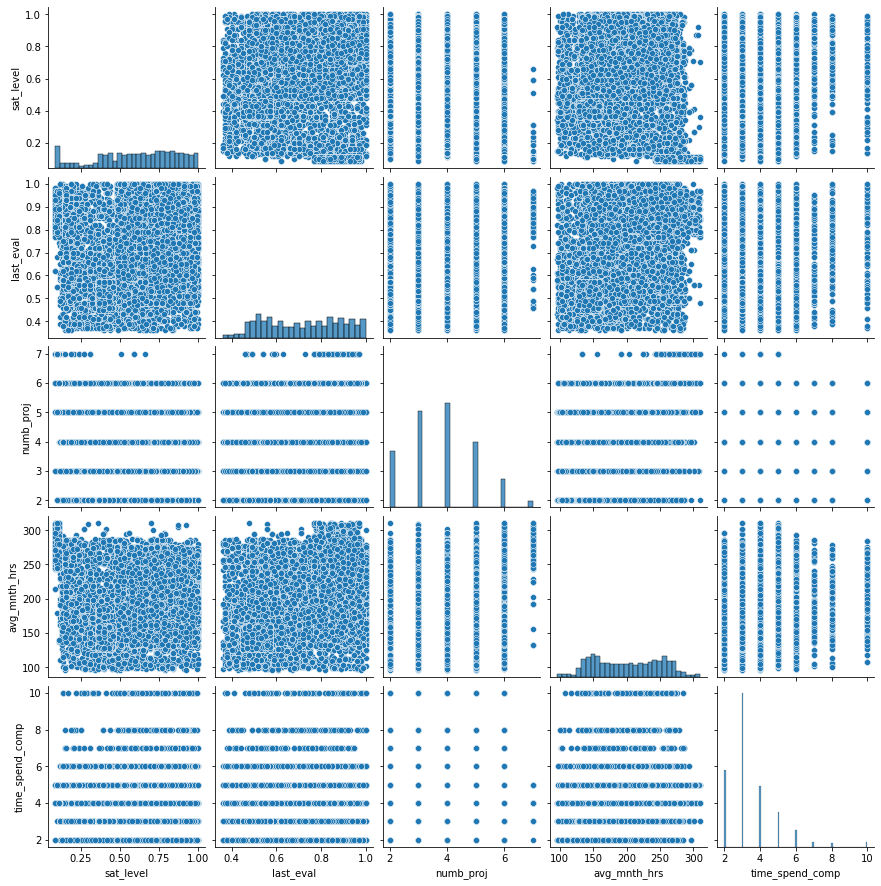

In [14]:
hr_num = hr[['sat_level','last_eval','numb_proj','avg_mnth_hrs','time_spend_comp']]
sns.pairplot(hr_num)

Рассчитаем корреляционную матрицу коэффициента Пирсона для количественных признаков (непрерывных и дискретных):

In [15]:
hr_num.corr().round(3)

,sat_level,last_eval,numb_proj,avg_mnth_hrs,time_spend_comp
sat_level,1.000,0.105,-0.143,-0.020,-0.101
last_eval,0.105,1.000,0.349,0.340,0.132
numb_proj,-0.143,0.349,1.000,0.417,0.197
avg_mnth_hrs,-0.020,0.340,0.417,1.000,0.128
time_spend_comp,-0.101,0.132,0.197,0.128,1.000


Коэффициент Спирмана:

In [16]:
hr_num.corr(method = 'spearman').round(3)

,sat_level,last_eval,numb_proj,avg_mnth_hrs,time_spend_comp
sat_level,1.000,0.162,0.006,0.062,-0.139
last_eval,0.162,1.000,0.350,0.342,0.161
numb_proj,0.006,0.350,1.000,0.398,0.252
avg_mnth_hrs,0.062,0.342,0.398,1.000,0.169
time_spend_comp,-0.139,0.161,0.252,0.169,1.000


Коэффициент Кендалла:

In [17]:
hr_num.corr(method = 'kendall').round(3)

,sat_level,last_eval,numb_proj,avg_mnth_hrs,time_spend_comp
sat_level,1.000,0.114,0.022,0.051,-0.110
last_eval,0.114,1.000,0.266,0.235,0.119
numb_proj,0.022,0.266,1.000,0.307,0.195
avg_mnth_hrs,0.051,0.235,0.307,1.000,0.119
time_spend_comp,-0.110,0.119,0.195,0.119,1.000


Визуализируем корреляционные матрицы:

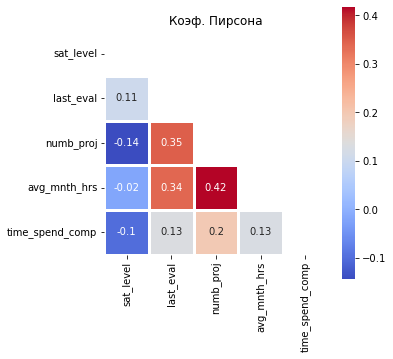

In [18]:
colors = 'coolwarm'
plt.figure(figsize = (5, 5)) 
matrix_1 = np.triu(hr_num.corr())
sns.heatmap(hr_num.corr(), annot = True, cmap = colors,
            mask = matrix_1, linewidth = 3, square = True).set_title('Коэф. Пирсона');

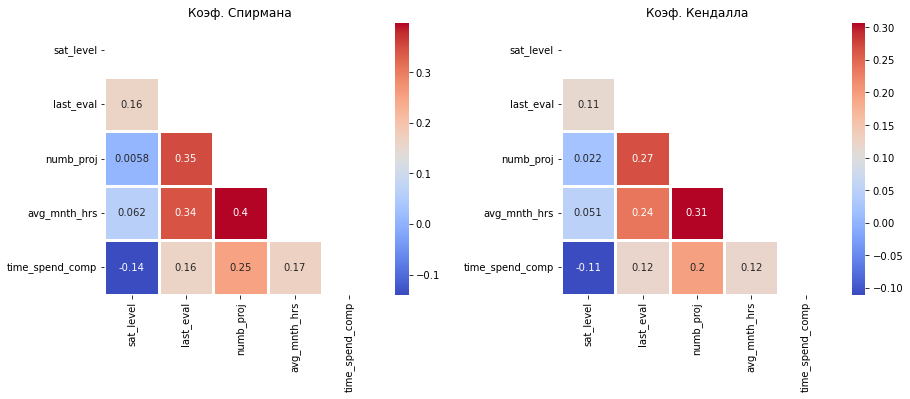

In [19]:
plt.figure(figsize = (15, 5)) 
plt.subplot(1,2,1)
matrix_2 = np.triu(hr_num.corr(method = 'spearman'))
sns.heatmap(hr_num.corr(method = 'spearman'), annot = True,
            cmap = colors, mask = matrix_2, linewidth = 3, square = True).set_title('Коэф. Спирмана');
plt.subplot(1,2,2)
matrix_3 = np.triu(hr_num.corr(method = 'kendall'))
sns.heatmap(hr_num.corr(method = 'kendall'), annot = True,
            cmap = colors, mask = matrix_3, linewidth = 3, square = True).set_title('Коэф. Кендалла');

Наиболее коррелированная пара:

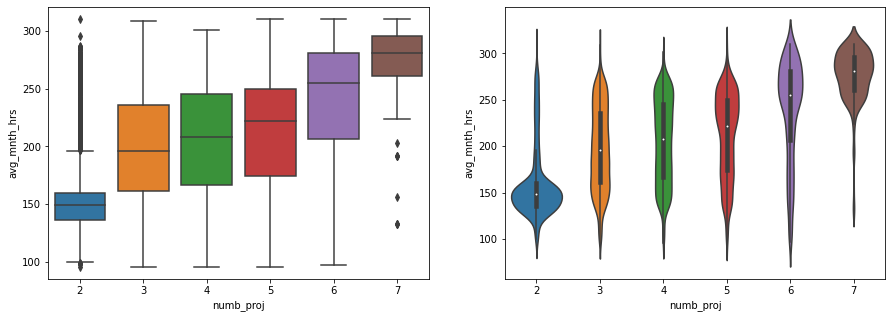

In [20]:
plt.figure(figsize = (15, 5)) 
plt.subplot(1,2,1)
sns.boxplot(data = hr, x = 'numb_proj', y = 'avg_mnth_hrs');
plt.subplot(1,2,2)
sns.violinplot(data = hr, x = 'numb_proj', y = 'avg_mnth_hrs');

Наименее коррелированная пара:

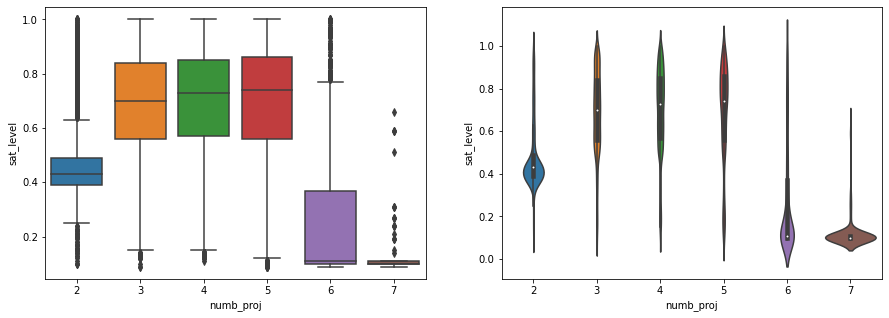

In [21]:
plt.figure(figsize = (15, 5)) 
plt.subplot(1,2,1)
sns.boxplot(data = hr, x = 'numb_proj', y = 'sat_level');
plt.subplot(1,2,2)
sns.violinplot(data = hr, x = 'numb_proj', y = 'sat_level');

##### 2. Выводы
* Коэффициент Пирсона оценивает линейную взаимосвязь, чувствителен к выбросам и асимметричности (skewness) распределения. Кендалл обычно имеет преимущество для малых выборок, что не актуально в данном случае. Признаки sat_level, numb_proj и time_spend_comp имеют достаточно асимметричные распределения. Поэтому будем опираться на значение коэффициента Спирмана.
* В целом среди всех видов коэффициентов относительно одинаковые показатели между признаками.  
* Наиболее коррелированная пара - numb_proj и avg_mnth_hrs. Связь положительная, скорее слабая, 0.3-0.4. При увеличении кол-ва проектов среднемес. кол-во рабочих часов имеет тенденцию к увеличению. Боксплот и violinplot для avg_mnth_hrs в разрезе numb_proj визуально отражают положительную взаимосвязь - увеличение медианного значения (а также Q1 и Q3) avg_mnth_hrs с увеличением numb_proj.
* Наименее скоррелированная пара numb_proj и sat_level. Коэффициент Пирсона по модулю больше, чем у Спирмана и Кендалла. Но эти две переменные как раз с достаточно асимметричным распределением, поэтому будем опираться на Спирмана. Коэффициент корреляции практически равен нулю. Боксплот и violinplot для sat_level в разрезе numb_proj визуально отражают увеличение медианы, Q1 и Q3 sat_level при переходе от двух к трем проектам. Но затем практически без изменений между 3, 4 и 5 проектами. И резкое снижение от пяти к шести и семи проектам. 
* Корреляции переменной time_spend_comp, у которой есть выбросы, не имеют значительных отличий между разными видами коэффициентов. Вероятно выбросы не оказали значительного влияния на коэф. корреляции Пирсона, который к ним чувствителен.

<a href="#0"><h4>Наверх</h4></a>

<p id="3">
<h4>3. Распределение сотрудников по департаментам</h4>

Корректнее считать исключая уволившихся, так как на месте уволившегося скорее всего работает другой человек (избежать двойного счета).  

Сколько сотрудников работает в каждом отделе (исключая уволившихся):

In [22]:
hr[hr.left == 0].dprmt.value_counts()

sales          3126
technical      2023
support        1674
IT              954
product_mng     704
RandD           666
marketing       655
accounting      563
management      539
hr              524
Name: dprmt, dtype: int64

Доля сотрудников в каждом отделе  (исключая уволившихся):

In [23]:
hr[hr.left == 0].dprmt.value_counts(normalize = True)

sales          0.274
technical      0.177
support        0.146
IT             0.083
product_mng    0.062
RandD          0.058
marketing      0.057
accounting     0.049
management     0.047
hr             0.046
Name: dprmt, dtype: float64

Визуализация распределения сотрудников по отделам  (исключая уволившихся):

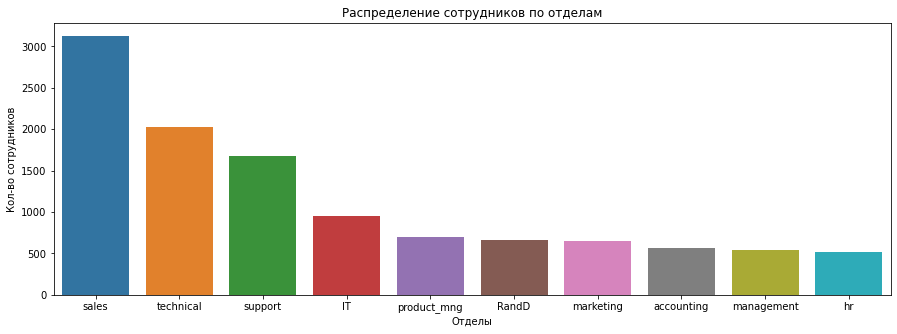

In [24]:
plt.figure(figsize = (15, 5)) 
dprmt_count = pd.DataFrame(hr[hr.left == 0].dprmt.value_counts()).reset_index()
ax = sns.barplot(x = 'index', y = 'dprmt', data = dprmt_count)
ax.set_title('Распределение сотрудников по отделам')
ax.set(xlabel = 'Отделы', ylabel = 'Кол-во сотрудников');

Распределение уволившихся сотрудников между отделами:

In [25]:
hr[hr.left == 1].dprmt.value_counts(normalize = True)

sales          0.284
technical      0.195
support        0.155
IT             0.076
hr             0.060
accounting     0.057
marketing      0.057
product_mng    0.055
RandD          0.034
management     0.025
Name: dprmt, dtype: float64

##### 3. Выводы
* Большая часть сотрудников работает в отделе sales - 3126 человек, 27%.  
* Следующие по величине отделы technical (2023 человек, 18%) и support (1674 человек, 15%).  
* Самый малочиcленный отдел - management.  
* Распределение уволившихся сотрудников между отделами в целом похоже на распределение работающих.

<a href="#0"><h4>Наверх</h4></a>

<p id="4">
<h4>4. Распределение сотрудников по зарплатам</h4>

Распределение сотрудников по зарплатам (исключая уволившихся):

In [26]:
hr[hr.left == 0].salary.value_counts()

low       5144
medium    5129
high      1155
Name: salary, dtype: int64

Распределение сотрудников по зарплатам в процентах (исключая уволившихся):

In [27]:
hr[hr.left == 0].salary.value_counts(normalize = True)

low       0.450
medium    0.449
high      0.101
Name: salary, dtype: float64

Распределение по зарплатам уволившихся сотрудников:

In [28]:
hr[hr.left == 1].salary.value_counts(normalize = True)

low       0.608
medium    0.369
high      0.023
Name: salary, dtype: float64

##### 4. Выводы
* Примерно одинаковое количество сотрудников имеет низкий и средний уровень зарплаты: 5144 человек, 45% (low) и 5129 человек, 44.8% (medium).  
* Высокая зарплата только у 10% сотрудников.  
* Среди уволившихся сотрудников большая часть имела низкий уровень зарплаты low - 60%.

<a href="#0"><h4>Наверх</h4></a>

<p id="5">
<h4>5. Распределение сотрудников по зарплатам в каждом из департаментов</h4>

Распределение сотрудников по зарплатам в каждом отделе по отдельности (исключая уволившихся):

In [29]:
pd.crosstab(hr[hr.left == 0].dprmt, hr[hr.left == 0].salary)

salary,high,low,medium
dprmt,,,
IT,79,437,438
RandD,47,309,310
accounting,69,259,235
hr,39,243,242
management,224,121,194
marketing,71,276,308
product_mng,62,346,296
sales,255,1402,1469
support,133,757,784


Доли сотрудников по зарплатам в каждом отделе по отдельности (исключая уволившихся):

In [30]:
pd.crosstab(hr[hr.left == 0].dprmt, hr[hr.left == 0].salary).apply(lambda r: r/r.sum(), axis = 1).round(2)

salary,high,low,medium
dprmt,,,
IT,0.08,0.46,0.46
RandD,0.07,0.46,0.47
accounting,0.12,0.46,0.42
hr,0.07,0.46,0.46
management,0.42,0.22,0.36
marketing,0.11,0.42,0.47
product_mng,0.09,0.49,0.42
sales,0.08,0.45,0.47
support,0.08,0.45,0.47


Распределение сотрудников по уровню зарплаты в разных отделах  (исключая уволившихся):

In [31]:
gr = hr[hr.left == 0].groupby(['dprmt','salary']).agg({'sat_level' : 'count'})
gr = gr.groupby(level = 0, group_keys = False).apply(lambda x: x.sort_values('sat_level' , ascending = False))
gr.rename(columns = {'sat_level': 'count'}, inplace = True)
gr

count
dprmt       salary       
IT          medium    438
            low       437
            high       79
RandD       medium    310
            low       309
            high       47
accounting  low       259
            medium    235
            high       69
hr          low       243
            medium    242
            high       39
management  high      224
            medium    194
            low       121
marketing   medium    308
            low       276
            high       71
product_mng low       346
            medium    296
            high       62
sales       medium   1469
            low      1402
            high      255
support     medium    784
            low       757
            high      133
technical   low       994
            medium    853
            high      176

Визуализация распределения сотрудников по уровню зарплаты между отделами:

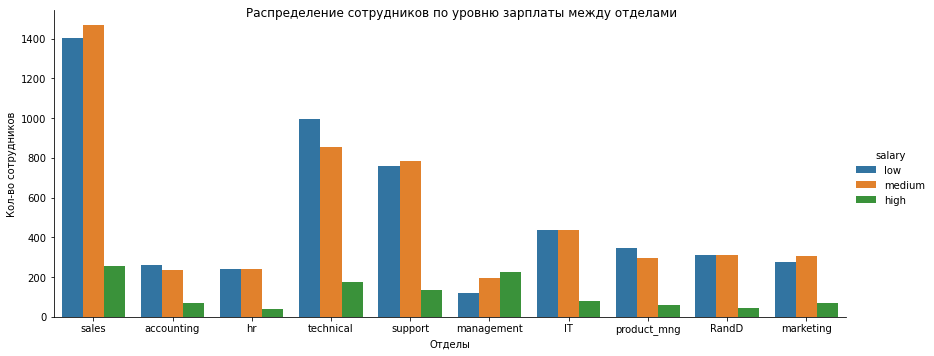

In [32]:
ax_2 = sns.catplot(x = 'dprmt', kind = "count", hue = 'salary', data = hr[hr.left == 0], height = 5, aspect = 12/5)
ax_2.set_axis_labels('Отделы', 'Кол-во сотрудников')
ax_2.fig.suptitle('Распределение сотрудников по уровню зарплаты между отделами');

Доли уволившихся сотрудников по зарплатам в каждом отделе по отдельности:

In [33]:
pd.crosstab(hr[hr.left == 1].dprmt, hr[hr.left == 1].salary).apply(lambda r: r/r.sum(), axis = 1).round(2)

salary,high,low,medium
dprmt,,,
IT,0.01,0.63,0.36
RandD,0.03,0.45,0.51
accounting,0.02,0.49,0.49
hr,0.03,0.43,0.54
management,0.01,0.65,0.34
marketing,0.04,0.62,0.33
product_mng,0.03,0.53,0.44
sales,0.01,0.69,0.30
support,0.01,0.70,0.28


##### 5. Выводы
* Наибольшая доля высоких зарплат в отделе management (42%).  
* Во всех отделах (кроме management) доли сотрудников с низкой и средней зарплатами очень схожи 42-49%.    
* В отделах sales и marketing число сотрудников со средними зарплатами чуть выше, чем с низкими.  
* Во всех отделах доля уволившихся с высокой зарплатой очень маленькая 1-4%. В большинстве отделов большая часть уволившихся - сотрудники с низкими зарплатами (кроме hr, accounting, RandD).

<a href="#0"><h4>Наверх</h4></a>

<p id="6">
<h4>6. Проверка гипотезы</h4>

Гипотеза: сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом.<br><br>
Две выборки: salary = low, salary = high.<br>
Признак avg_mnth_hrs.<br>
Н0: среднее кол-во рабочих часов в мес сотрудников с высоким окладом <= сотрудников с низким окладом.<br>
Н1: среднее кол-во рабочих часов в мес сотрудников с высоким окладом > сотрудников с низким окладом.<br>

Посмотрим показатели на наших данных. Средние отличаются незначительно. Среднее среди сотрудников с низкими зарплатами чуть выше.

In [34]:
mnth_hrs_low = hr[hr.salary == 'low']['avg_mnth_hrs']
print('среднее кол-во часов сотрудников с низким окладом',round(mnth_hrs_low.mean(),2))
mnth_hrs_high = hr[hr.salary == 'high']['avg_mnth_hrs']
print('среднее кол-во часов сотрудников с высоким окладом',round(mnth_hrs_high.mean(),2))

среднее кол-во часов сотрудников с низким окладом 201.0
среднее кол-во часов сотрудников с высоким окладом 199.87


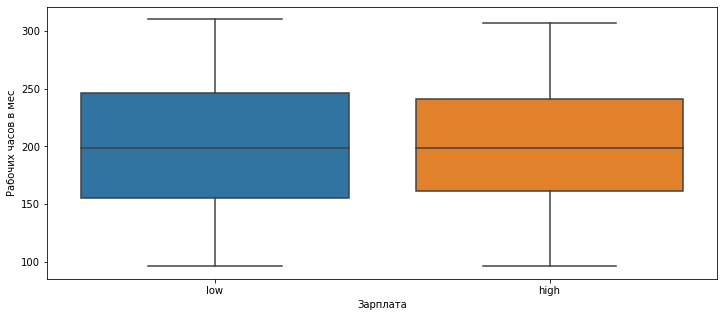

In [35]:
mnth_hrs_low_high = hr[hr.salary.isin(['low','high'])][['avg_mnth_hrs','salary']]
plt.figure(figsize = (12, 5)) 
ax_3 = sns.boxplot(x = 'salary', y = 'avg_mnth_hrs', data = mnth_hrs_low_high )
ax_3.set(xlabel = 'Зарплата', ylabel = 'Рабочих часов в мес');

Используем двувыборочный, односторонний Т-тест. Поправка Уэлча на случай неравенства дисперсий. Уровень значимости общепринятый 5%.

In [36]:
t,p = stats.ttest_ind(mnth_hrs_high, mnth_hrs_low, equal_var = False, alternative = 'greater')
print(round(t,4), round(p,4))

-0.7624 0.777


##### 6. Выводы
* Вне зависимости от распределения признака avg_mnth_hrs можем протестировать гипотезу о его среднем, так как объем данных очень большой (и среднее и дисперсия выглядят конечными) и Центральная Предельная Теорема позволяет это сделать.  
* Гипотеза: сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом.  
* Сравниваем среднее по признаку avg_mnth_hrs между двумя группами salary = low, salary = high.  
* В наших данных средние отличаются незначительно, при этом среднее сотрудников с низким окладом чуть выше.  
* Тест показывает, что недостаточно аргументов для отвержения нулевой гипотезы в пользу альтернативной (даже при большем уровне значимости). Среднее кол-во рабочих часов в мес сотрудников с высоким окладом не больше, чем у сотрудников с низким окладом.

<a href="#0"><h4>Наверх</h4></a>

<p id="7">
<h4>7. Сравнение уволившихся и не уволившихся</h4>

Доля сотрудников с повышением (и без) за последние 5 лет среди уволившихся и неуволившихся сотрудников (по отдельности):

In [37]:
gr_2 = hr.groupby(['left','prom_last_5y']).agg({'sat_level': 'count'})
gr_2.groupby(level = 0).apply(lambda x:  100 * x / x.sum())

sat_level
left prom_last_5y           
0    0                97.375
     1                 2.625
1    0                99.468
     1                 0.532

Средняя степень удовлетворенности среди уволившихся и неуволившихся сотрудников (по отдельности):

In [38]:
hr.groupby('left')['sat_level'].mean()

left
0    0.667
1    0.440
Name: sat_level, dtype: float64

Среднее количество проектов среди уволившихся и неуволившихся сотрудников (по отдельности):

In [39]:
hr.groupby('left')['numb_proj'].mean()

left
0    3.787
1    3.856
Name: numb_proj, dtype: float64

##### 7. Выводы
* Среди уволившихся доля сотрудников с повышением за последние 5 лет меньше (0.5%), чем среди работающих (2.6%).
* Средняя степень удовлетворенности среди уволившихся ниже, чем у работающих (0.44 против 0.66).
* Средняя количество проектов среди уволившихся чуть выше, чем у работающих (3.9 против 3.8), можно сказать не отличается.

<a href="#0"><h4>Наверх</h4></a>

<p id="8">
<h4>8. Линейный дискриминантный анализ</h4>

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report

Строим модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary).

В качестве независимых переменных LDA работает только с количественными признаками, не с категориальными (есть мнение, что dummy переменные можно использовать в случае, когда классы одинакового размера - не наш случай). Поэтому для построения модели будем работать с количественными признаками: 'sat_level', 'last_eval', 'numb_proj', 'avg_mnth_hrs', 'time_spend_comp'.

##### Отбор факторов

Посмотрим взаимосвязь дамми увольнения и числовых факторов. На глаз заметные практические различия средних и медиан между уволившимися только у sat_level.

In [41]:
num_column = ['sat_level', 'last_eval', 'numb_proj','avg_mnth_hrs','time_spend_comp']
for col in num_column:
    print(col, 'mean_1: ',round(hr[hr.left == 1][col].mean(),3), 'mean_0: ',round(hr[hr.left == 0][col].mean(),3))
    print(col, 'median_1: ',round(hr[hr.left == 1][col].median(),3), 'median_0: ',round(hr[hr.left == 0][col].median(),3))
    print('')

sat_level mean_1:  0.44 mean_0:  0.667
sat_level median_1:  0.41 median_0:  0.69

last_eval mean_1:  0.718 mean_0:  0.715
last_eval median_1:  0.79 median_0:  0.71

numb_proj mean_1:  3.856 mean_0:  3.787
numb_proj median_1:  4.0 median_0:  4.0

avg_mnth_hrs mean_1:  207.419 mean_0:  199.06
avg_mnth_hrs median_1:  224.0 median_0:  198.0

time_spend_comp mean_1:  3.877 mean_0:  3.38
time_spend_comp median_1:  4.0 median_0:  3.0



Проверим какие из различий в средних статистически значимы с помощью двустороннего теста Т-теста Стьюдента (распредление факторов не похоже на нормальное, но у нас достаточный объем данных, так что положимся на ЦПТ). Кроме last_eval по все факторам отвержение нулевой гипотезы о равенстве средних. Наибольшая и значительно отличающаяся от других тест-статистика по sat_level.

In [42]:
import scipy.stats as stats 

In [43]:
for col in num_column:
    t,p = stats.ttest_ind(hr[hr.left == 1][col], hr[hr.left == 0][col])
    print(col,'stat=', round(t,2),', p=', round(p,4))

sat_level stat= -51.61 , p= 0.0
last_eval stat= 0.8 , p= 0.4213
numb_proj stat= 2.91 , p= 0.0036
avg_mnth_hrs stat= 8.75 , p= 0.0
time_spend_comp stat= 17.92 , p= 0.0


Другой подход к выбору факторов по критерию mutual information, которая измеряет сокращение неопределенности для одной переменной при известном значении другой. Самый значимый фактор sat_level. Далее numb_proj, avg_mnth_hrs, last_eval и time_spend_comp.

In [44]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest

In [45]:
fs = SelectKBest(score_func = mutual_info_classif, k ='all')
X = hr[num_column]
y = hr.left
fs.fit(X, y)
X_fs = fs.transform(X)
for i in num_column:
    print(f'{i}: {fs.scores_[num_column.index(i)].round(5)}')

sat_level: 0.26687
last_eval: 0.10167
numb_proj: 0.17871
avg_mnth_hrs: 0.13525
time_spend_comp: 0.08817


Проверим две модели: все факторы и один фактор sat_level.

##### Модель 1 (все количественные признаки)

Сначала с помощью кросс-валидации выберем модель.

Делим данные на обучающую и тестовую выборку. Уволившихся сотрудников всего 24%, то есть классы не сбалансированы. Поэтому при разделении на выборки лучше применить параметр stratify, который позволит сохранить пропорциональное деление на 0 и 1 при разделении на выборки. Можно также использовать параметр shuffle, который перед разделением будет перемешивать данные.

In [46]:
hr_sample = hr.loc[:,['sat_level', 'last_eval', 'numb_proj','avg_mnth_hrs','time_spend_comp']]

X_train, X_test, y_train, y_test = train_test_split(hr_sample, hr.left, test_size = 0.3,
                                                            random_state = 1, stratify =  hr.left, shuffle = True )

cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 5, random_state = 1)

scores_acc = cross_val_score(LinearDiscriminantAnalysis(), X_train, y_train, scoring = 'accuracy', cv = cv)
print('accuracy', 'среднее', round(np.mean(scores_acc),4), 'медиана', round(np.median(scores_acc),4))

scores_pr = cross_val_score(LinearDiscriminantAnalysis(), X_train, y_train, scoring = 'precision', cv = cv)
print('precision', 'среднее',  round(np.mean(scores_pr),4), 'медиана', round(np.median(scores_pr),4))

scores_re = cross_val_score(LinearDiscriminantAnalysis(), X_train, y_train, scoring = 'recall', cv = cv)
print('recall', 'среднее',  round(np.mean(scores_re),4), 'медиана', round(np.median(scores_re),4))

accuracy среднее 0.7598 медиана 0.76
precision среднее 0.493 медиана 0.4931
recall среднее 0.2683 медиана 0.266


##### Модель 2 (один признак sat_level)

In [47]:
hr_sample_2 = hr.loc[:,['sat_level']]

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(hr_sample_2, hr.left, test_size = 0.3,
                                                            random_state = 1, stratify =  hr.left, shuffle = True )

cv_2 = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 5, random_state = 1)

scores_acc_2 = cross_val_score(LinearDiscriminantAnalysis(), X_train_2, y_train_2, scoring = 'accuracy', cv = cv_2)
print('accuracy', 'среднее', round(np.mean(scores_acc_2),4), 'медиана', round(np.median(scores_acc_2),4))

scores_pr_2 = cross_val_score(LinearDiscriminantAnalysis(), X_train_2, y_train_2, scoring = 'precision', cv = cv_2)
print('precision', 'среднее',  round(np.mean(scores_pr_2),4), 'медиана', round(np.median(scores_pr_2),4))

scores_re_2 = cross_val_score(LinearDiscriminantAnalysis(), X_train_2, y_train_2, scoring = 'recall', cv = cv_2)
print('recall', 'среднее',  round(np.mean(scores_re_2),4), 'медиана', round(np.median(scores_re_2),4))

accuracy среднее 0.7641 медиана 0.7619
precision среднее 0.5099 медиана 0.5
recall среднее 0.2697 медиана 0.268


Модель из одного фактора дает такие же или даже чуть лучше метрики, чем модель со всеми факторами. Если по качеству модели не отличаются, то выбираем более простую модель.

Выбираем модель 2, обучаем на обучающей выборке, формируем прогноз на тестовой, выводим коэффициент:

In [48]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_2, y_train_2)
lda.predict(X_test_2)
print('Коэффициенты: ', round(lda.coef_[0][0],4))

Коэффициенты:  -4.3504


Оцениваем качество модели на тестовой выборке. Accuracy и precision такие же как в кросс-валидации, recall чуть меньше.

In [49]:
print(confusion_matrix(y_test_2, lda.predict(X_test_2)))
print(classification_report(y_test_2, lda.predict(X_test_2)))

[[3161  268]
 [ 802  269]]
              precision    recall  f1-score   support

           0       0.80      0.92      0.86      3429
           1       0.50      0.25      0.33      1071

    accuracy                           0.76      4500
   macro avg       0.65      0.59      0.59      4500
weighted avg       0.73      0.76      0.73      4500



##### 8. Выводы
* LDA предполагает нормальное распределение, хотя отступление обычно не является критичным. Судя по гистограммам выше в нашем случае это условие вряд ли выполняется.
* Базовая оценка качества это accuracy, но она является хорошей метрикой для сбалансированных классов.
* Precision можно интерпретировать как долю объектов, названных моделью уволившимися и при этом действительно ими являющимися. Среди названных моделью уволившимися - какая часть определена корректно (остальные - модель назвала уволившимися, а на самом деле нет).
* Recall показывает, какую долю уволившихся нашел алгоритм. Среди на самом деле уволившихся сотрудников - какую часть модель определила как уволившихся (остальные - модель назвала НЕ уволившимися, а они на самом деле уволившиеся). Кажется цена ошибки "не определить уволившегося" выше, чем ложно определить не уволившегося, поэтому будем опираться на метрику Recall.
* Значение метрики Recall всего 0.25, то есть из всех уволившихся модель определяет корректно только 25%.
* Из 1071 уволившегося модель корректно определила только 269 сотрудников.
* Стоит попробовать модель логистической регресии: есть мнение, что она предпочтительнее для дихотомичного таргета; позволяет использовать дамми переменные; устойчива к отклонениям от нормальности распределения.

<a href="#0"><h4>Наверх</h4></a>